In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv('events.csv', low_memory=False)

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [4]:
file.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
file['time'] = pd.to_datetime(file['timestamp'])
file['month'] = file['time'].dt.month

In [7]:
visited = file.loc[file.event=='visited site']

In [8]:
visited['month'].value_counts().to_frame()

,month
5,40137
6,22419
4,12650
3,7247
2,2790
1,2135


In [9]:
#agrupo las visitas por mes y calculo en cada uno la cantidad de visitas por cada channel
a = visited.groupby('month').agg({'channel':'value_counts'})

In [10]:
a

channel
month channel          
1     Paid          711
      Direct        618
      Referral      402
      Organic       352
      Social         51
      Email           1
2     Paid         1196
      Direct        819
      Referral      424
      Organic       310
      Social         38
      Email           3
3     Paid         3354
      Direct       1861
      Referral     1095
      Organic       796
      Social        124
      Email          17
4     Paid         5606
      Direct       3548
      Referral     1940
      Organic      1504
      Social         39
      Email          12
      Unknown         1
5     Paid        20632
      Direct       8214
      Organic      5770
      Referral     5211
      Social        267
      Email          35
      Unknown         8
6     Paid        12694
      Organic      3616
      Direct       3462
      Referral     2312
      Social        327
      Email           8

In [11]:
#unstack para el index asi me quedan como columnas mas lindo
forgraph = a.unstack().head(5) #me quedo hasta mayo porque junio tiene solo la mitad y
                                #obviamente va a tener menos visitas

In [12]:
forgraph

channel                                               
channel  Direct Email Organic     Paid Referral Social Unknown
month                                                         
1         618.0   1.0   352.0    711.0    402.0   51.0     NaN
2         819.0   3.0   310.0   1196.0    424.0   38.0     NaN
3        1861.0  17.0   796.0   3354.0   1095.0  124.0     NaN
4        3548.0  12.0  1504.0   5606.0   1940.0   39.0     1.0
5        8214.0  35.0  5770.0  20632.0   5211.0  267.0     8.0

In [13]:
#dropeo el unknown que es poco significativo
sinunknown = forgraph.drop('Unknown',axis=1,level=1)

In [25]:
forgraph.columns = ['Direct', 'Email', 'Organic', 'Paid', 'Referral', 'Social', 'Unknown']

In [26]:
forgraph

,Direct,Email,Organic,Paid,Referral,Social,Unknown
month,,,,,,,
1,618.0,1.0,352.0,711.0,402.0,51.0,NaN
2,819.0,3.0,310.0,1196.0,424.0,38.0,NaN
3,1861.0,17.0,796.0,3354.0,1095.0,124.0,NaN
4,3548.0,12.0,1504.0,5606.0,1940.0,39.0,1.0
5,8214.0,35.0,5770.0,20632.0,5211.0,267.0,8.0


# Visitas segun canal que las originó, evolucion en el tiempo

AxesSubplot(0.125,0.125;0.775x0.755)


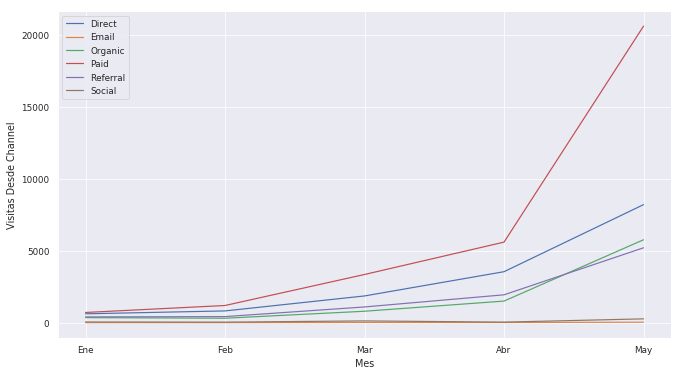

In [343]:
sns.set()
sns.set_context('paper')
fig,ax = plt.subplots(figsize=(11,6))
g=sns.lineplot(ax=ax,data=forgraph.reset_index(),x='month',y='Direct')
g=sns.lineplot(ax=ax,data=forgraph.reset_index(),x='month',y='Email')
g=sns.lineplot(ax=ax,data=forgraph.reset_index(),x='month',y='Organic')
g=sns.lineplot(ax=ax,data=forgraph.reset_index(),x='month',y='Paid')
g=sns.lineplot(ax=ax,data=forgraph.reset_index(),x='month',y='Referral')
g=sns.lineplot(ax=ax,data=forgraph.reset_index(),x='month',y='Social')
g.legend(['Direct', 'Email', 'Organic', 'Paid', 'Referral', 'Social'])
g.set_xticks(ticks=[1,2,3,4,5])                    # esto es para renombrar los valores del eje x porque 
g.set_xticklabels(['Ene','Feb','Mar','Abr','May']) # sino pone los meses como floats (re cualquiera mal)
g.set_xlabel('Mes')
g.set_ylabel('Visitas Desde Channel')
print(g)

In [167]:
personas = file.loc[file.event=='visited site'].groupby('person').apply(lambda x: x['channel'].head(1))

In [168]:
personas.to_frame().head()

,,channel
person,,
0004b0a2,1,Paid
0006a21a,5,Paid
000a54b2,9,Paid
00184bf9,45,Organic
0019c395,96,Paid


In [169]:
personas.value_counts()

Paid        17809
Organic      5710
Direct       2207
Referral      684
Social        478
Email          10
Unknown         1
Name: channel, dtype: int64

In [173]:
personas_df = personas.to_frame()

In [174]:
compras = file.loc[file.event=='conversion'].groupby('person').agg({'event':'count'})

In [175]:
channel_compras = personas_df.join(compras).fillna(0)

In [176]:
channel_compras.head()

,,channel,event
person,,,
0004b0a2,1,Paid,0.0
0006a21a,5,Paid,0.0
000a54b2,9,Paid,0.0
00184bf9,45,Organic,0.0
0019c395,96,Paid,0.0


In [177]:
channel_compras['compro'] = channel_compras['event']>0

In [178]:
channel_compras.head()

,,channel,event,compro
person,,,,
0004b0a2,1,Paid,0.0,False
0006a21a,5,Paid,0.0,False
000a54b2,9,Paid,0.0,False
00184bf9,45,Organic,0.0,False
0019c395,96,Paid,0.0,False


In [189]:
channel_compras_graph = channel_compras.reset_index().drop(['person','level_1'],axis=1)

In [191]:
channel_compras_graph.columns = ['canal','compras','compro']

In [181]:
graph = channel_compras_graph.groupby('canal').agg({'compro':['count','sum']})
graph.columns=['visitas','compras']

In [182]:
graph

,visitas,compras
canal,,
Direct,2207,85.0
Email,10,0.0
Organic,5710,148.0
Paid,17809,326.0
Referral,684,55.0
Social,478,17.0
Unknown,1,0.0


# Cantidad de personas que visitaron por primera vez el sitio segun canal

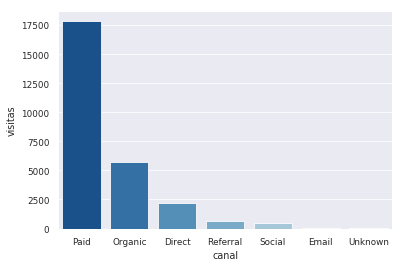

In [342]:
sns.set()
sns.set_context('paper')
sns.barplot(data=graph_plot,x=graph_plot.index,y='visitas',palette='Blues_r')
plt.show()

# Cantidad de personas que compraron segun desde donde ingresaron al sitio

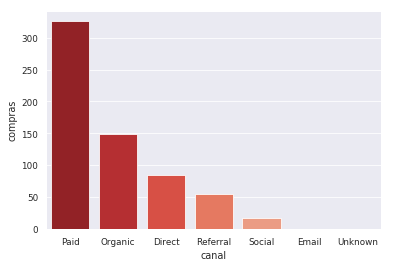

In [341]:
sns.set()
sns.set_context('paper')
sns.barplot(data=graph_plot,x=graph_plot.index,y='compras',palette='Reds_r')

Hay muchas mas personas que ingresaron por primera vez desde Paid, pero la diferencia en compras no es tan grande